In [1]:
%%capture
%run intro.ipynb

In [2]:
header = ["Table", "Row", "Description", "Special",]

df_homeCredit_columns_description = pd.read_csv("../data/HomeCredit_columns_description.csv", skiprows=1, names=header, index_col=0, encoding = 'unicode_escape')
df_homeCredit_columns_description.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [3]:
df_homeCredit_columns_description.sample(5)

,Table,Row,Description,Special
66,application_{train|test}.csv,ELEVATORS_MODE,Normalized information about building where th...,normalized
163,credit_card_balance.csv,AMT_PAYMENT_CURRENT,How much did the client pay during the month o...,NaN
142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
195,previous_application.csv,NAME_PAYMENT_TYPE,Payment method that client chose to pay for th...,NaN
86,application_{train|test}.csv,LIVINGAREA_MEDI,Normalized information about building where th...,normalized


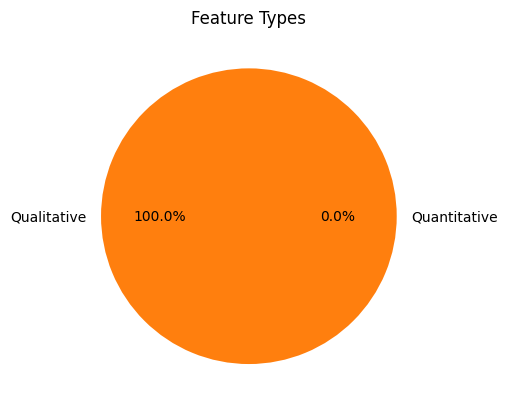

In [4]:
import matplotlib.pyplot as plt

def get_feature_types(df):
    quantitative_features = [] 
    qualitative_features = [] 
    for feature in df.columns:     
        if df[feature].dtype in (float, int):         
            quantitative_features.append(feature)     
        else:         
            qualitative_features.append(feature) 
    return quantitative_features, qualitative_features

quantitative_features, qualitative_features = get_feature_types(df_homeCredit_columns_description)

# Get the counts of quantitative and qualitative features
quant_count = len(quantitative_features)
qual_count = len(qualitative_features)

plt.pie([quant_count, qual_count], labels=['Quantitative', 'Qualitative'], autopct='%1.1f%%')
plt.title('Feature Types')
plt.show()


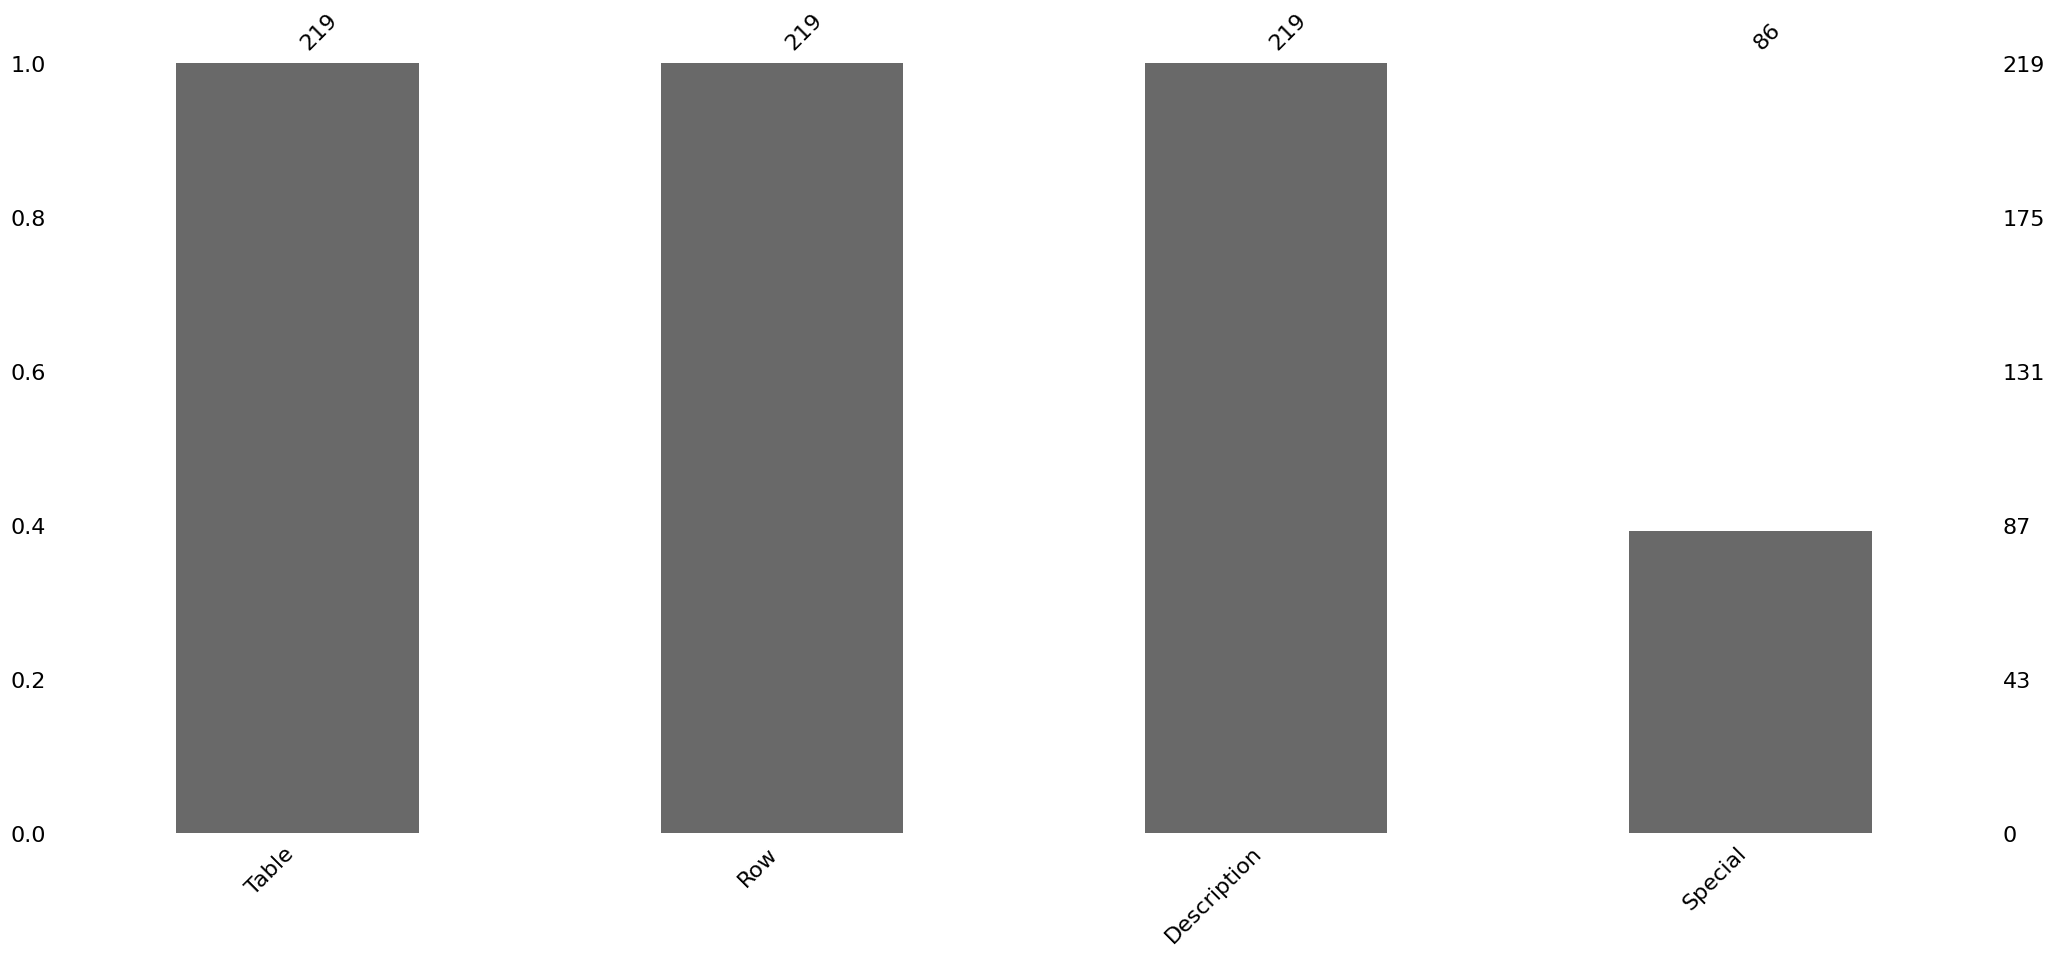

In [5]:
import missingno as msno

# Create the missing value bar plot
msno.bar(df_homeCredit_columns_description)

# Show the plot
plt.show()


In [6]:
df_homeCredit_columns_description.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        219 non-null    object
 1   Row          219 non-null    object
 2   Description  219 non-null    object
 3   Special      86 non-null     object
dtypes: object(4)
memory usage: 8.6+ KB


In [7]:
df_homeCredit_columns_description.describe()

,Table,Row,Description,Special
count,219,219,219,86
unique,7,196,163,7
top,application_{train|test}.csv,SK_ID_CURR,Normalized information about building where th...,normalized
freq,122,6,47,53


In [8]:
duplicated = len(df_homeCredit_columns_description)-len(df_homeCredit_columns_description.drop_duplicates())
print(f"Duplicate Rows : {duplicated}")

Duplicate Rows : 0


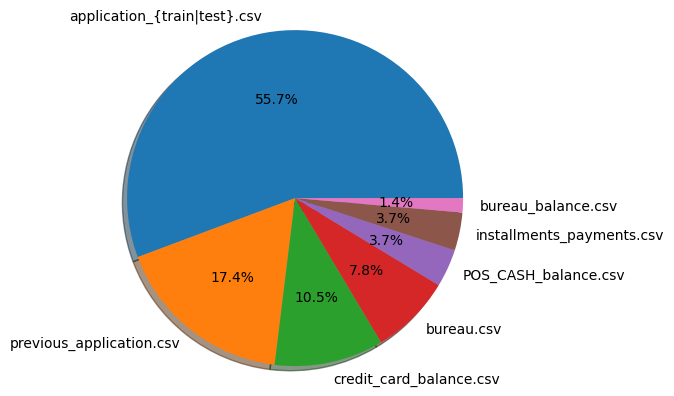

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is the dataframe and 'column' is the column name to be plotted in the pie chart
counts = df_homeCredit_columns_description['Table'].value_counts()
labels = counts.index
sizes = counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.show()


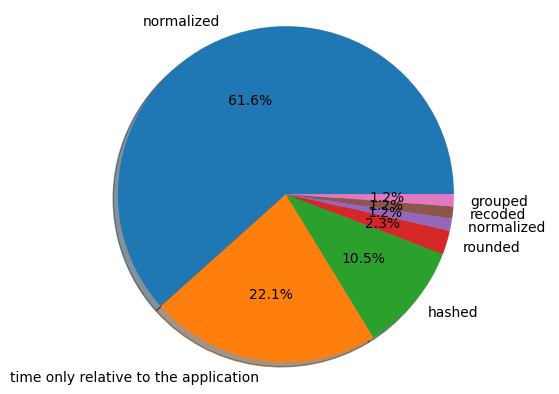

In [10]:
import matplotlib.pyplot as plt

# Assuming 'df' is the dataframe and 'column' is the column name to be plotted in the pie chart
counts = df_homeCredit_columns_description['Special'].value_counts()
labels = counts.index
sizes = counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.show()
